# Estudio del test SAT

Vamos a analizar un estudio que recogió datos de los resultados del test SAT (un test estándar que se utiliza ampliamanete para admisiones en USA) por estados, combinados con otros datos.

El test SAT se utiliza para medir el rendimiento de los estudiantes y, compararlo con el gasto en educación. La idea es la de tratar de entender si hay una relación entre el gasto y los resultados. En este caso, el estudio es de un sólo año y se compara entre los diferentes estados de Estados Unidos.

Es importante resaltar que el tema del impaco del gasto en los resultados es un tema recurrente en política educativa, y genera debates sobre la verdadera incidencia del gasto. Hay quien sostiene que no es el gasto lo importante, sino cómo se gasta el dinero, mientras que otras posiciones tienden a intentar igualar el gasto en favor de la igualdad de oportunidades.

Según la documentacion del data set (https://ww2.amstat.org/publications/jse/secure/v7n2/datasets.guber.cfm) tenemos las siguientes variables:
* state: Nombre de los estados
* expend: Gasto actual por alumno, en promedio de asistencia diaria en escuelas públicas, primarias y secundarias, 1994-95 (en miles de dólares)
* ratio: Promedio del ratio alumno/maestro en escuelas de primaria y secundaria públicas, otoño 1994
* salary: Salario anual promedio de maestros en escuelas públicas de primaria y secundaria enre 194-95, en miles de dólares.
* frac: Porcentaje de estudiantes elegibles que realizaron el SAT, 1994-95
* verbal: Promedio en calificación verbal de la puntuación SAT, 1994-95
* math: Promedio en matemáticas de la puntuación SAT, 1994-95
* sat: Promedio total de la puntuación SAT, 1994-95

Hemos de tener en cuenta que los atributos expend, ratio y salary se relacionan directa o indirectamente con el gasto, y el gracias al dataset podemos relacionar estos datos con los resultados del SAT totales o sus componentes verbal y math.

Se pide:
* Analizar gráficamente si los scores del test tienen una escala similar y los componentes tienen relación.
* Ordenar los datos y obtener los estados que más (y menos) gastan y los que mejores (y peores) resultados obtienen
* Analizar de manera intuitiva con gráficos si hay relación entre las variables que indican resultados (las del test SAT) y las variables que indican gasto.
* Utilziar correlaciones y un modelo lineal básico como exploración numérica de ese tipo de relación gasto/resultados. ¿Cuál es la conclusión aparente?.

En primer lugar hemos de obtener el data set.

In [1]:
#Lo descargamos directamente de la página de documentación en el apartado de 
# descarga del .txt
import urllib.request

link = "https://ww2.amstat.org/publications/jse/datasets/sat.dat.txt"
urllib.request.urlretrieve(link, "sat.dat")

#Ahora lo pasamos a data frame
import pandas as pd
df = pd.read_csv("sat.dat", delim_whitespace=True, names=["state",
                                                         "expend",
                                                         "ratio",
                                                         "salary",
                                                         "frac",
                                                         "verbal",
                                                         "math",
                                                         "sat"])
#Mostramos las primeras filas
df.head(10)

,state,expend,ratio,salary,frac,verbal,math,sat
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902
5,Colorado,5.443,18.4,34.571,29,462,518,980
6,Connecticut,8.817,14.4,50.045,81,431,477,908
7,Delaware,7.030,16.6,39.076,68,429,468,897
8,Florida,5.718,19.1,32.588,48,420,469,889
9,Georgia,5.193,16.3,32.291,65,406,448,854


Una vez que ya tenemos el data frame, podemos obtener unas estadísticas básicas de las componentes del SAT verbal y math
* Componente verbal

In [2]:
print("Media de la variable verbal", df["verbal"].mean())
print("Valor máximo de la varialbe verbal", df["verbal"].max())
print("Valor mínimo de la varialbe verbal",df["verbal"].min())

Media de la variable verbal 457.14
Valor máximo de la varialbe verbal 516
Valor mínimo de la varialbe verbal 401


* Componente math

In [3]:
print("Media de la variable verbal", df["math"].mean())
print("Valor máximo de la varialbe verbal", df["math"].max())
print("Valor mínimo de la varialbe verbal",df["math"].min())

Media de la variable verbal 508.78
Valor máximo de la varialbe verbal 592
Valor mínimo de la varialbe verbal 443


A grandes rasgos, ambas variables están en una misma escala, únicamente cabe destacar que los alumnos que se presentaron al SAT obtuvieron mejores resultados en matemáticas. Ahora obtendremos las mismas estadísticas de la puntuación total del SAT, atnes de realizar los análisis gráficamente.
* Total de la puntuación SAT

In [4]:
print("Media de la variable verbal", df["sat"].mean())
print("Valor máximo de la varialbe verbal", df["sat"].max())
print("Valor mínimo de la varialbe verbal",df["sat"].min())

Media de la variable verbal 965.92
Valor máximo de la varialbe verbal 1107
Valor mínimo de la varialbe verbal 844


Ahora sí que podemos ver que la escala cambia, pero esto simplemente se debe a que sat es la suma de los promedios verbal y math. A continuación, realizaremos el análisis gráficamente. Analizaremos cada variable mediante histogramas.

## Análisis gráfico de los scores del test SAT

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

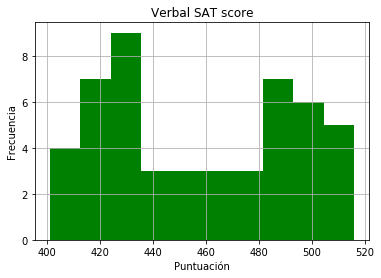

In [6]:
plt.hist(df["verbal"], color = "green")
plt.title("Verbal SAT score")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.grid(True)

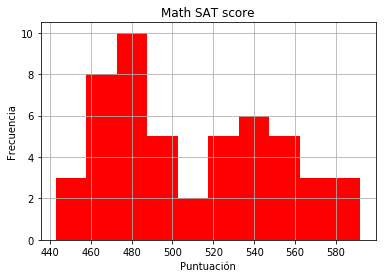

In [7]:
plt.hist(df["math"], color = "red")
plt.title("Math SAT score")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.grid(True)

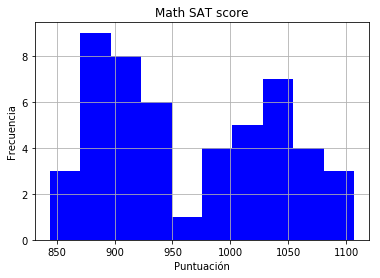

In [8]:
plt.hist(df["sat"], color = "blue")
plt.title("Math SAT score")
plt.xlabel("Puntuación")
plt.ylabel("Frecuencia")
plt.grid(True)

También podríamos haber obtenido las gráficas de forma automática mediante una función.

In [9]:
def get_hist():
    """
    Función que obtiene gráficas sobre las puntuaciones del sat
    :param: None
    :return: void
    """
    cols = ["verbal", "math", "sat"]
    colors = ["green", "red", "blue"]

    pos = 0
    plt.figure(figsize=(35,5))
    for i in range(0, len(cols)):
        #Obtenemos subgráficas para obtener las 3 en un mismo cuadrante
        plt.subplot(161+pos)
        plt.hist(df[cols[i]], color = colors[i])
        plt.title(str(cols[i]) + " score")
        plt.xlabel("Puntuacion")
        plt.ylabel("Frecuencia")
        plt.grid(True)
        pos += 1

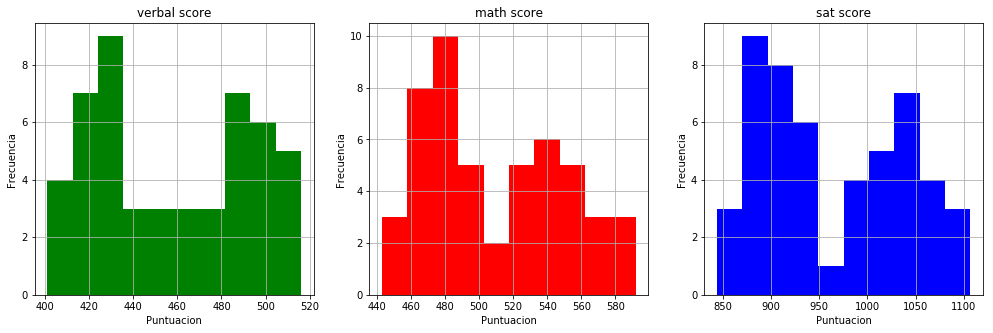

In [10]:
get_hist()

Como ya se ha mencionado anteriormente, en vista de los resultaos obtenidos desde los histogramas, se puede apreciar el cambio de escala en la variable sat y que los resultados máximos están en las calificaciones de matemáticas. Cabe destacar además que en la variable de calificación verbal, hay un gran número de calificaciones por debajo del 5, es decir, alumnos que en promedio no superaron con éxito la prueba.

Siguiendo con el análisis del test SAT, ahora obtendremos los ranking en función de los estados que más y menso gastan así como los mejores y peores resultados obtenidos.

## Estados que más y menos gastan por alumno

In [11]:
df_sorted_sat = df[["state","expend"]].sort_values("expend", ascending=False)
df_sorted_sat["RANK"] = range(1,df["sat"].size+1)
df_sorted_sat.set_index("RANK", inplace=True)
df_sorted_sat.iloc[:5,].append(df_sorted_sat.iloc[-5:,])

,state,expend
RANK,,
1,New Jersey,9.774
2,New York,9.623
3,Alaska,8.963
4,Connecticut,8.817
5,Rhode Island,7.469
46,Alabama,4.405
47,Tennessee,4.388
48,Idaho,4.210
49,Mississippi,4.080


## Estados que más y menos gastan por profesor

In [12]:
df_sorted_sat = df[["state","salary"]].sort_values("salary", ascending=False)
df_sorted_sat["RANK"] = range(1,df["sat"].size+1)
df_sorted_sat.set_index("RANK", inplace=True)
df_sorted_sat.iloc[:5,].append(df_sorted_sat.iloc[-5:,])

,state,salary
RANK,,
1,Connecticut,50.045
2,Alaska,47.951
3,New York,47.612
4,New Jersey,46.087
5,Pennsylvania,44.510
46,Oklahoma,28.172
47,Mississippi,26.818
48,Louisiana,26.461
49,North Dakota,26.327


## Estados con mejor y peor puntuación SAT

In [13]:
df_sorted_sat = df[["state","sat"]].sort_values("sat", ascending=False)
df_sorted_sat["RANK"] = range(1,df["sat"].size+1)
df_sorted_sat.set_index("RANK", inplace=True)
df_sorted_sat.iloc[:5,].append(df_sorted_sat.iloc[-5:,])

,state,sat
RANK,,
1,North Dakota,1107
2,Iowa,1099
3,Minnesota,1085
4,Utah,1076
5,Wisconsin,1073
46,Indiana,882
47,Pennsylvania,880
48,North Carolina,865
49,Georgia,854


Una vez que conocemos los datos, al menos apriori, no somos capaces de deducir si existe una relación entre el gasto y las puntuaciones, ya que por lo general, aparecen diferentes países. Por consiguiente, vamos a realizar el análisis del gasto/puntuación de forma gráfica

## Gráficas relación gasto/resultados

Importamos sklearn para utilizar el modelo lineal y numpy para trabajar con matrices (ajuste del modelo).

In [14]:
from sklearn import linear_model
import numpy as np

In [15]:
def linear_model_graphs():
    """
    Función que obtiene las correlaciones entre variables económicas y sociales
    del test sat, además muestra por pantalla las gráficas de dichas correalaciones
    realizándo para ello gráficas cruzadas entre variables económicas y sociales
    :param: None
    :return: void
    """   
    plt.figure(figsize=(20,10))
    #Variables de puntuación (sociales)
    scores = ["verbal", "math", "sat"]
    #Variables económicas
    costs = ["expend", "salary"]
    #Cada puntuación con un color distinto
    colors = ["blue", "red" ,"green"]

    pos = 0
    #Iteramos para obtener una gráfica por cada puntuación una de gasto 2 para cada 
    # puntuación 6 gráficas
    for i in range(0, len(scores)):
        #Para cada puntuación una gráfica económica
        for j in range(0, len(costs)):
            plt.subplot(321+pos)
            #Obtenemos un data frame con los valores de las variables indicadas en las listas y ordenadas
            a = df[scores+costs].sort_values(scores[i], ascending=True)
            print("Correlación (" + scores[i] + "," + costs[j] + "): " + str(df[costs[j]].corr(df[scores[i]])))
            plt.scatter(a[scores[i]], a[costs[j]], color=colors[i])
            plt.xlabel(scores[i] + " score")
            plt.ylabel("Miles de dólares")
            # Creamos un modelo de regresión "vacío"
            clf = linear_model.LinearRegression()
            # Entrenamos el modelo tomando todos los datos
            x1 = a[scores[i]]
            X = x1[:, np.newaxis] # Necesario porque fit() espera una matriz.
            y = a[costs[j]]
            clf.fit(X, y) #Obtenemos de esta forma el R^2 de cada par de variables

            # El modelo
            plt.plot(X, clf.predict(X), color = colors[i], linewidth=3)
            print("R-squared (" + scores[i] + "," + costs[j] + "): "+ str(clf.score(X, y)))
            print("-------------")


            plt.legend(["Recta de regresion",costs[j]])

            pos += 1

Correlación (verbal,expend): -0.410049872133
R-squared (verbal,expend): 0.168140897636
-------------
Correlación (verbal,salary): -0.476963635342
R-squared (verbal,salary): 0.227494309438
-------------
Correlación (math,expend): -0.349414091107
R-squared (math,expend): 0.122090207064
-------------
Correlación (math,salary): -0.401312816829
R-squared (math,salary): 0.161051976951
-------------
Correlación (sat,expend): -0.380537003305
R-squared (sat,expend): 0.144808410884
-------------
Correlación (sat,salary): -0.439883381442
R-squared (sat,salary): 0.193497389269
-------------


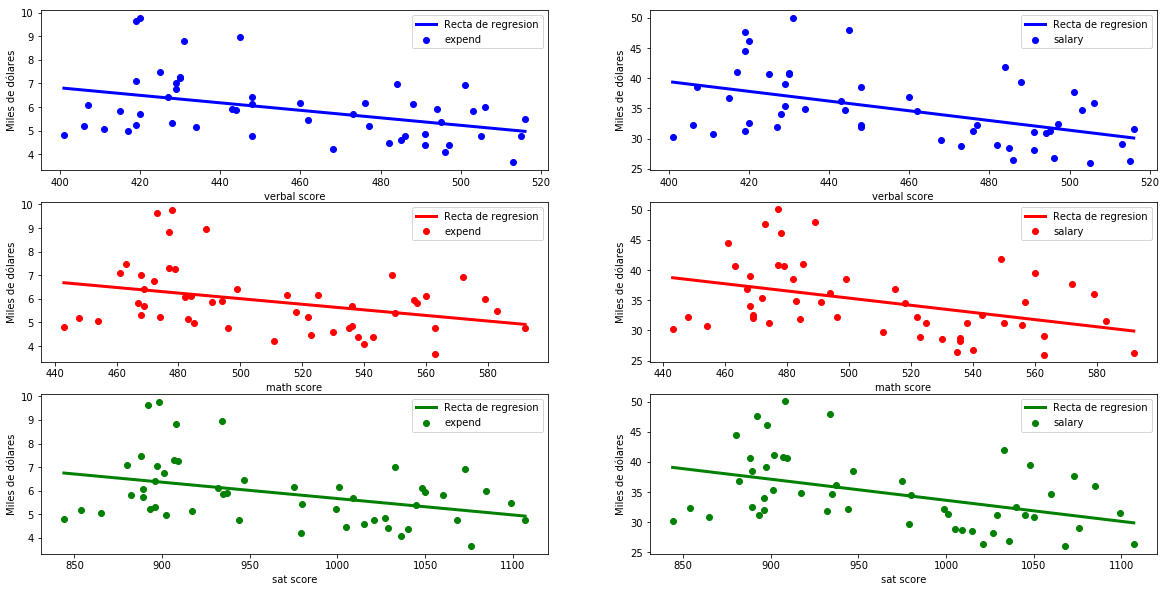

In [16]:
linear_model_graphs()

Tras realizar el análisis de los estados en función de gasto/resultados y obtener las gráficas, correlaciones R-Cuadrado de las variables de puntuación con el gasto, podemos afirmar que no tienen ningún tipo de relación ya que todas las correlaciones son negativas y los R-Cuadrado muy lejanos de 1.